# Unit 03 Project -- Chaos
# Poincaré Maps for the Damped Driven Pendulum


## Purpose

The purpose of this project is to create a model of a Poincare Map for a Damped Driven Pendulum with a given value of gamma. As the physics of the pendulum change the Poincare Map should also be updated as well. 

## Model

To model the motion of the pendulum, I will use the ODES Solver and the RK4 method. 
The differential equaitons used in this model will be:

<br>
$\frac{d\theta}{dt}=\omega$
<br>
$\frac{d\omega}{dt} = \omega_0^2\gamma \cos(\omega_d t)-\omega_0^2\sin\theta-2\beta\omega$

## The Code

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import ode
from scipy.optimize import curve_fit
from IPython.display import display, Markdown, Latex

In [42]:
def model_pendulum(y, t): # y=[theta,omega]; function returns [dtheta/dt, domega/dt]    
    theta = y[0]
    omega = y[1]
    dtheta_dt = omega
    domega_dt = omega_0**2*gam*np.cos(omega_d*t) - omega_0**2*np.sin(theta)-2*beta*omega
    
    return np.array([dtheta_dt, domega_dt])

In [43]:
def run_pendulum(g, bet, theta_i, omega_i, t_total):
    global gam, beta, omega_0, omega_d

    omega_d = 2*np.pi
    omega_0 = 1.5*omega_d
    beta = bet
    gam = g

    t = 0.0
    h = 0.001

    y0 = [theta_i, omega_i]
    tdata = []
    thetadata = []
    omegadata = []
    Fddata = []

    tdata.append(t)
    thetadata.append(theta_i)
    omegadata.append(omega_i)
    Fddata.append(gam*np.cos(omega_d*t))

    while t < t_total:
        #integrate
        y1 = ode.RK4(model_pendulum, y0, t, h) #update y[n]
        
        if(y1[0] < -np.pi):
            y1[0] = y1[0] + 2*np.pi  
        elif(y1[0] > np.pi):
            y1[0] = y1[0] - 2*np.pi

        for i in range(len(y1)): #reset y0 to the new vector
            y0[i] = y1[i]

        t = t + h #update clock

        tdata.append(t)
        thetadata.append(y1[0])
        omegadata.append(y1[1])
        Fddata.append(gam*np.cos(omega_d*t))

    return np.array(tdata), np.array(thetadata), np.array(omegadata), np.array(Fddata)

In [44]:
def plt_phase(thetas, omegas):
    plt.figure(figsize=(10,6))
    plt.title("Phase Plot for Damped Driven Pendulum")
    plt.plot(thetas, omegas, 'g-', linewidth=0.75, label='gamma = %.2f' % gam)
    plt.xlabel("θ (rad)")
    plt.ylabel("ω (rad/s)")
    plt.legend(loc='lower right')
    plt.show()

In [45]:
def p_map(gam):
    omegas=omegadata[-N_last:]
    thetas=thetadata[-N_last:]
    
    f_Fddata = Fddata[-N_last:]
    
    map_omegas = []
    map_thetas = []
    for i in range(2, len(f_Fddata)):
        if ((f_Fddata[i-1]-f_Fddata[i-2])>0 and (f_Fddata[i]-f_Fddata[i-1])<0):
            map_omegas.append(omegas[i-1])
            map_thetas.append(thetas[i-1])
            
    plt.figure(figsize=(10,6))
    plt.title("Poincaré Map for Damped Driven Pendulum")
    plt.xlabel("θ (rad)")
    plt.ylabel("ω (rad/s)")
    plt.plot(map_thetas, map_omegas,'bo')
    plt.show()

Enter value for gamma: 1


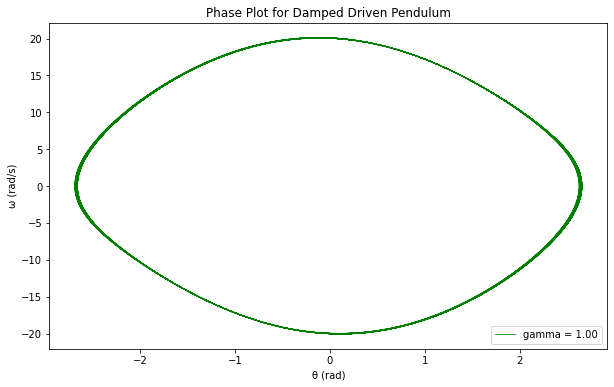

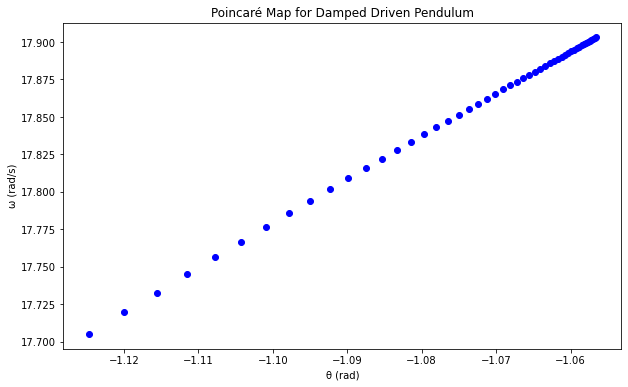

In [46]:
gamma = input("Enter value for gamma: ") #N/m^3
N_last=50*1000

tdata, thetadata, omegadata, Fddata = run_pendulum(float(gamma), 3/4*np.pi, -np.pi/2, 0, 70)

thetas=thetadata[-N_last:]
omegas=omegadata[-N_last:]

plt_phase(thetas, omegas)
p_map(float(gamma))

## Validation

For validation, I will change the gamma value by a small amount and I am expecting to see a different plot

Below is the map for gamma of 1.05

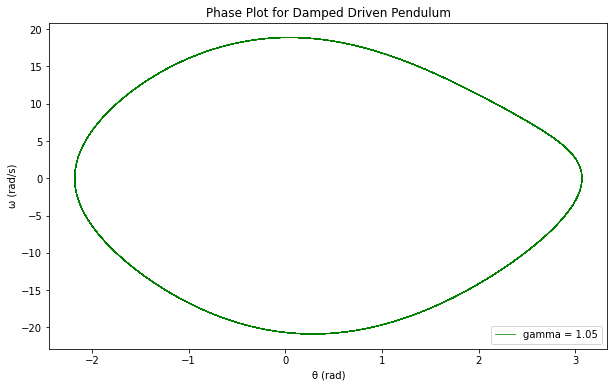

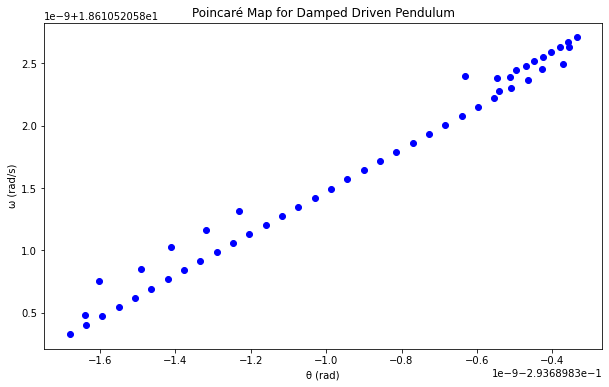

In [47]:
gamma = 1.05 #N/m^3
N_last=50*1000

tdata, thetadata, omegadata, Fddata = run_pendulum(float(gamma), 3/4*np.pi, -np.pi/2, 0, 70)

thetas=thetadata[-N_last:]
omegas=omegadata[-N_last:]

plt_phase(thetas, omegas)
p_map(float(gamma))

### Increasing gamma to 1.07

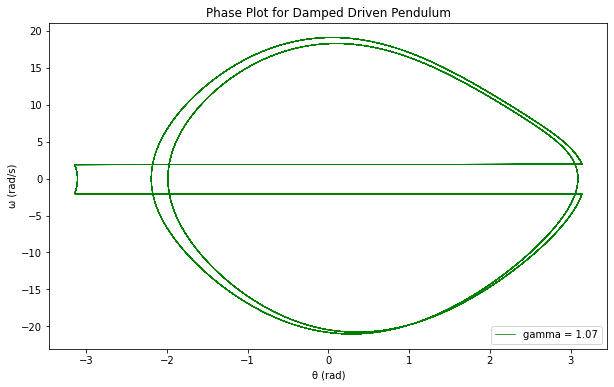

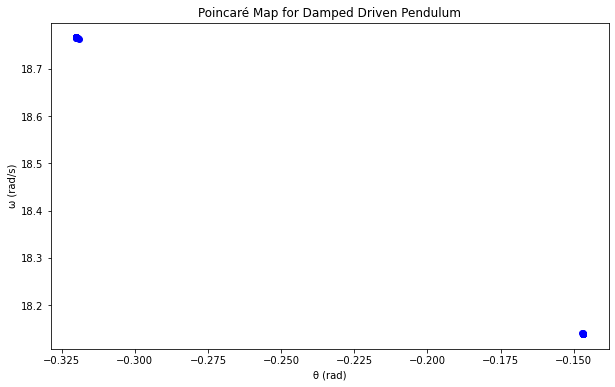

In [48]:
gamma = 1.07 #N/m^3
N_last=50*1000

tdata, thetadata, omegadata, Fddata = run_pendulum(float(gamma), 3/4*np.pi, -np.pi/2, 0, 70)

thetas=thetadata[-N_last:]
omegas=omegadata[-N_last:]

plt_phase(thetas, omegas)
p_map(float(gamma))

### For validation of the Poincaré Map, I will leave the gamma value the same but change N_last. 
### The graph should keep its shape but as you increase N_last more points should be plotted and as you decrease it less points will be plotted.

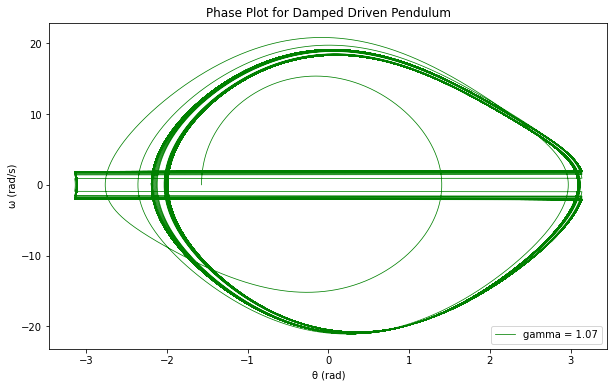

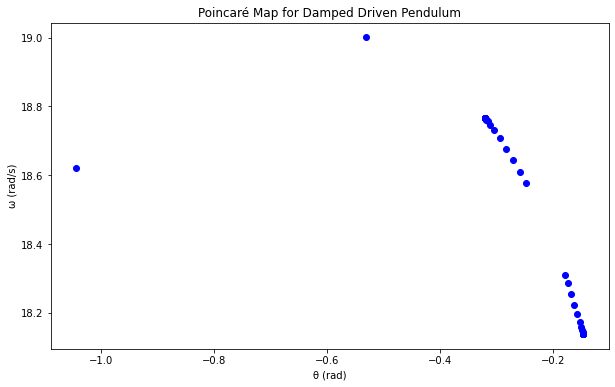

In [49]:
gamma = 1.07 #N/m^3

#Making N_last higher
N_last=75*1000

tdata, thetadata, omegadata, Fddata = run_pendulum(float(gamma), 3/4*np.pi, -np.pi/2, 0, 70)

thetas=thetadata[-N_last:]
omegas=omegadata[-N_last:]

plt_phase(thetas, omegas)
p_map(float(gamma))

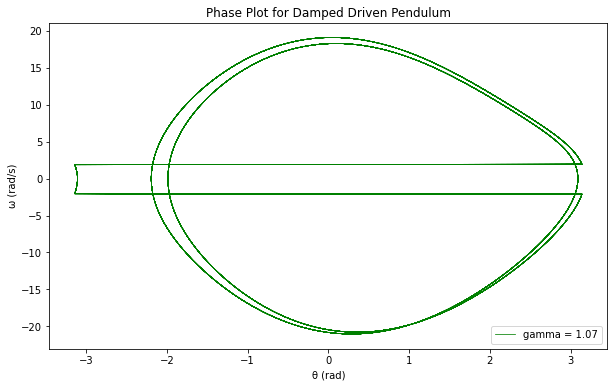

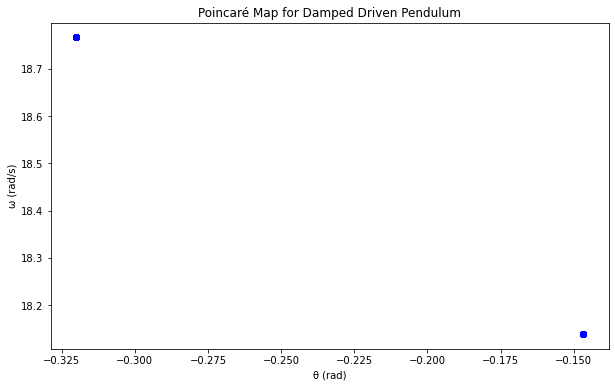

In [50]:
gamma = 1.07 #N/m^3

#Making N_last lower
N_last=25*1000

tdata, thetadata, omegadata, Fddata = run_pendulum(float(gamma), 3/4*np.pi, -np.pi/2, 0, 70)

thetas=thetadata[-N_last:]
omegas=omegadata[-N_last:]

plt_phase(thetas, omegas)
p_map(float(gamma))

## References

A majority of the code for this project was referenced from Professor Dr. Titus. Such as the model for the Damped Driven Pendulum and a majority of the functions.